# Introduction

This project visualizes stock data from Yahoo Finance! to assess the risk of Netflix stock. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. The content and direction for the project comes from [Codecademy](https://www.codecademy.com/). 

For the purposes of the project, the following visualizations are created below:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: The Dow Jones Industrial Average is used to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1. Import modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2. Load datasets

In [2]:
#load dataset 1 - Netflix stocks
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [3]:
#load dataset 2 - Dow Jones stocks
dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  


Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [4]:
#load dataset 3 - Netflix stocks by quarter
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  


In [5]:
#rename the Adjusted Close title
netflix_stocks.rename(columns={'Adj Close':'Adjusted_Close'}, inplace=True)
dowjones_stocks.rename(columns={'Adj Close':'Adjusted_Close'}, inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close':'Adjusted_Close'}, inplace=True)

## Step 3. Examine data

#### Netflix

In [6]:
netflix_stocks.shape

(12, 7)

In [7]:
netflix_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Date              12 non-null object
Open              12 non-null float64
High              12 non-null float64
Low               12 non-null float64
Close             12 non-null float64
Adjusted_Close    12 non-null float64
Volume            12 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
netflix_stocks.describe()

,Open,High,Low,Close,Adjusted_Close,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,162.109168,174.188333,154.949168,168.079169,168.079169,1.420596e+08
std,22.427309,22.889526,19.519561,21.298918,21.298918,3.597514e+07
min,124.959999,143.460007,124.309998,140.710007,140.710007,9.143200e+07
25%,145.734997,152.212501,138.952503,149.010003,149.010003,1.141848e+08
50%,157.715004,175.744995,149.455002,168.890007,168.890007,1.360994e+08
75%,182.205002,192.247501,173.475002,184.235005,184.235005,1.667328e+08
max,197.240005,204.380005,184.320007,196.429993,196.429993,2.086578e+08


#### Dow Jones

In [9]:
dowjones_stocks.shape

(12, 7)

In [10]:
dowjones_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
Date              12 non-null object
Open              12 non-null float64
High              12 non-null float64
Low               12 non-null float64
Close             12 non-null float64
Adjusted_Close    12 non-null float64
Volume            12 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 800.0+ bytes


In [11]:
dowjones_stocks.describe()

,Open,High,Low,Close,Adjusted_Close,Volume
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,21576.639323,22090.152507,21334.914388,21937.621745,21937.621745,6.510095e+09
std,1332.002426,1458.599365,1321.564593,1503.771517,1503.771517,6.329533e+08
min,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,5.392630e+09
25%,20884.259278,21101.965332,20404.488281,20908.442383,20908.442383,6.176700e+09
50%,21211.425781,21732.415039,21136.760742,21620.375000,21620.375000,6.536170e+09
75%,22092.194824,22685.944824,21886.223144,22648.127441,22648.127441,7.010125e+09
max,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703,7.335640e+09


#### Netflix Quarterly

In [12]:
netflix_stocks_quarterly.shape

(251, 8)

In [13]:
netflix_stocks_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
Date              251 non-null object
Open              251 non-null float64
High              251 non-null float64
Low               251 non-null float64
Close             251 non-null float64
Adjusted_Close    251 non-null float64
Volume            251 non-null int64
Quarter           251 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


In [14]:
netflix_stocks_quarterly.describe()

,Open,High,Low,Close,Adjusted_Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,165.402311,167.048725,163.487012,165.374263,165.374263,6.589608e+06
std,21.311867,21.594081,20.968138,21.295641,21.295641,4.117679e+06
min,124.959999,128.190002,124.309998,127.489998,127.489998,2.160500e+06
25%,144.564995,145.750000,143.329994,144.245002,144.245002,4.500900e+06
50%,162.910004,163.929993,160.550003,162.429993,162.429993,5.518600e+06
75%,185.915001,188.120002,183.209999,185.594994,185.594994,7.145300e+06
max,201.949997,204.380005,198.089996,202.679993,202.679993,4.158740e+07


Examine timeline represented in the data:

In [15]:
#earliest date on Netflix and Dow Jones data
netflix_stocks['Date'].min()

'2017-01-01'

In [16]:
#latest date on Netflix and Dow Jones data
netflix_stocks['Date'].max()

'2017-12-01'

In [17]:
netflix_stocks_quarterly['Date'].min()

'2017-01-03'

In [18]:
netflix_stocks_quarterly['Date'].max()

'2017-12-29'

## Step 5. Visualize data - Netflix Quarters


To get an understanding of the distribution of the Netflix quarterly stock prices for 2017, a violin plot for each quarter can be used to see fluctuation between quarters.

Text(0, 0.5, 'Closing Stock Price')

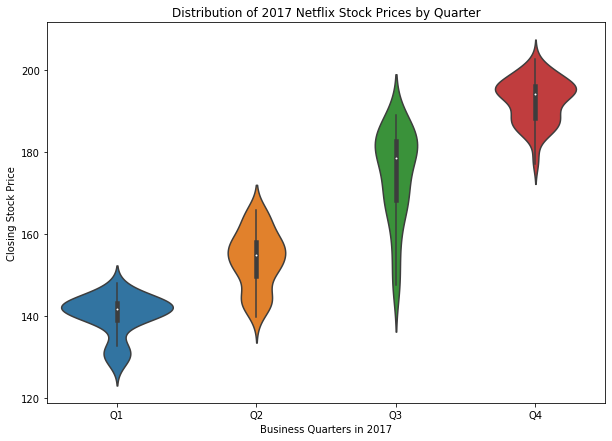

In [19]:
fig = plt.subplots(figsize=(10,7))
ax = sns.violinplot()
sns.violinplot(
    data = netflix_stocks_quarterly,
    x = 'Quarter',
    y = 'Adjusted_Close'
)
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
plt.xlabel('Business Quarters in 2017')
plt.ylabel('Closing Stock Price')

## Step 6. Visualize data - Actual vs. Estimated


The chart below shows the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. 

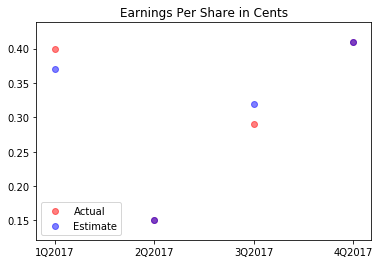

In [20]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions, earnings_actual, c='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, c='blue', alpha=0.5)
plt.legend(['Actual','Estimate'], loc=3)
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')
plt.show()

## Step 7. Visualize data - Revenue vs. Earnings

Below is a visualization of the earnings and revenue reported by Netflix.

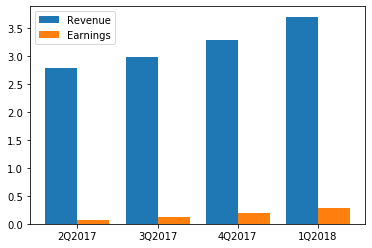

In [21]:
#metrics below are in billions of dollars
revenue_by_quarter = [2.79,2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  #first dataset
t = 2 #total number of datasets
d = len(revenue_by_quarter) #number of sets of bars
w = 0.8 #bar width
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  #second dataset
t = 2 #total number of datasets
d = len(earnings_by_quarter) #number of sets of bars
w = 0.8 #bar width
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)



middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
plt.xticks(middle_x, quarter_labels)
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.show()

## Step 8. Netflix vs. Dow Jones

Netflix stock compared to the Dow Jones Industrial Average in 2017. 

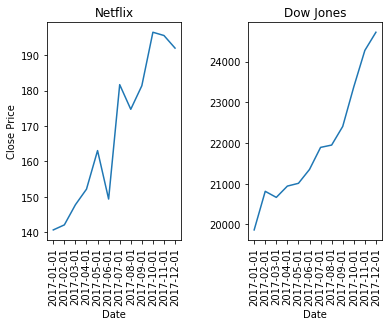

In [22]:
#Netflix (left)
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Adjusted_Close'])
ax1.set_title('Netflix')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Close Price')

#Dow Jones (right)
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Adjusted_Close'])
ax2.set_title('Dow Jones')
plt.xlabel('Date')
plt.xticks(rotation=90)


plt.subplots_adjust(wspace=.5)
plt.show()